# ExploreAI Academy Classification Hackathon
## Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

## Import Libraries

In [65]:
import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt
import seaborn as sb
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#Libraries for vectorising the data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 100 ###

# Load Dataset

In [66]:
df = pd.read_csv(r"C:\Users\Tshela healthcare\Desktop\Explore 2023\south-african-language-identification-hack-2023\train_set.csv")
df_test = pd.read_csv(r"C:\Users\Tshela healthcare\Desktop\Explore 2023\south-african-language-identification-hack-2023\test_set.csv")

In [3]:
df.head(20)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


# Data Preprocessing

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [5]:
df.lang_id.describe()

count     33000
unique       11
top         xho
freq       3000
Name: lang_id, dtype: object

# Data Preprocessing

In [67]:
#Converting characters to lower case
X = df['text'].str.lower()
#df['message'].head()
y = df['lang_id']
#Converting characters to lower case for the df_test 
Z=df_test['text'].str.lower()
Z.head()

0    mmasepala, fa maemo a a kgethegileng a letlele...
1    uzakwaziswa ngokufaneleko nakungafuneka eminye...
2           tshivhumbeo tshi fana na ngano dza vhathu.
3    kube inja nelikati betingevakala kutsi titsini...
4                        winste op buitelandse valuta.
Name: text, dtype: object

## Replacing all url links with the word URL and removing symbols and newlines

In [68]:
df['text'] = df['text'].str.replace('[^\w\s]','non_alphanumeric').str.replace('\n',' ')
df_test['text'] = df_test['text'].str.replace('[^\w\s]','non_alphanumeric').str.replace('\n',' ')

df['text'] = df['text'].str.replace('http\S+|www.\S+', 'URL', case=False)
df_test['text'] =df_test['text'].str.replace('http\S+|www.\S+', 'URL', case=False)

In [69]:
# Function to remove non-English characters using regular expressions
cleaned_string = lambda x: re.sub(r'\b[^a-zA-Z0-9]+\b', ' ', re.sub(r'[^\x00-\x7f]', r'', x)).replace(r'[0-9a-zA-Z ]+', '')

# Function to remove words containing digits using regular expressions with lambda function
cleaned_string_2 = lambda x: re.sub(r'\w*\d\w*', '', x).strip()

# Applying data cleaning steps
stop = stopwords.words('english')   #removing english stop words
X = X.apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
Z = Z.apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

X = X.apply(cleaned_string_2).apply(cleaned_string)
Z = Z.apply(cleaned_string_2).apply(cleaned_string)

## Tokensing the feature variable and removing the noise around each token using the lemmatization

In [70]:
#tokenize the words
tokenizer = TreebankWordTokenizer()
X = X.apply(lambda x: " ".join(tokenizer.tokenize(x)))
Z = Z.apply(lambda x: " ".join(tokenizer.tokenize(x)))

#lemmatize the words and remove non english words
lemmatizer = WordNetLemmatizer()
X_lem = X.apply(lambda x: lemmatizer.lemmatize(x))
Z_lem = Z.apply(lambda x: lemmatizer.lemmatize(x))

In [71]:
vect = CountVectorizer(max_df=0.5, min_df=10, ngram_range=(1, 3))

# Convert y_lem column to a list and fit vectorizer to data
vect.fit(X_lem.tolist())

# Transform the data
train= vect.transform(X_lem.tolist())
test= vect.transform(Z_lem.tolist())


# Get the labels for each word in the vector
word_labels = vect.get_feature_names_out()

# Turn vector into a DataFrame
train_df = pd.DataFrame(train.toarray(), columns=word_labels)
test_df=pd.DataFrame(test.toarray(), columns=word_labels)


# print the head of the vector dataframe
train_df.head()

,aa,aan,aan die,aan die einde,aan elke,aan enige,aan jou,aan te,aan te meld,aandag,...,zwo ralo,zwo tea,zwo teaho,zwo vha,zwohe,zwohe zwa,zwohe zwi,zwone,zwone kha,zwothe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
print('Train features (rows,columns):',train_df.shape)
print('Test features (rows,columns):',test_df.shape)

Train features (rows,columns): (33000, 23836)
Test features (rows,columns): (5682, 23836)


# Exploratory Data Analysis (EDA)

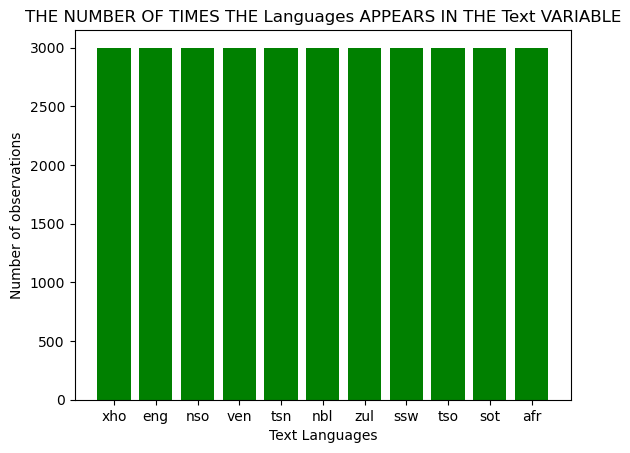

In [85]:
#Make a list of the classes to produce a bar graph of the count of each class
type_labels = list(y.unique())

#Count how many times a class appears in the target variable
heights = [len(y[y == label]) for label in type_labels]
bars = pd.DataFrame(zip(heights, type_labels), columns=['heights','names'])
bars = bars.sort_values(by='heights',ascending=True)

#plot
plt.bar(range(len(bars)),bars['heights'],color='green')
plt.xticks(range(len(bars)),bars['names'])
plt.ylabel("Number of observations")
plt.xlabel('Text Languages')
plt.title('THE NUMBER OF TIMES THE Languages APPEARS IN THE Text VARIABLE')
plt.show()

In [74]:
class_size = 4000

# Select a subset of the train_df and y dataframes
train_subset = train_df[:class_size]
y_subset = y[:class_size]

# Compiling the features and labels into one dataframe
data = pd.concat([train_subset, y_subset], axis=1)
data.head()

,aa,aan,aan die,aan die einde,aan elke,aan enige,aan jou,aan te,aan te meld,aandag,...,zwo tea,zwo teaho,zwo vha,zwohe,zwohe zwa,zwohe zwi,zwone,zwone kha,zwothe,lang_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,xho
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,xho
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,eng
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nso
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ven


# Modelling

## Train Test Split
SPLITTING THE DATA INTO TRAIN AND VALIDATION SET

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=50)

## FITTING DIFFERENT MODELS TO THE TRAIN DATA

In [76]:
#Fitting a multinomial naive bayes model
# Convert the text data into numerical features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
#X_test = vectorizer.transform(X_test)

In [77]:
# Fitting a multinomial naive bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [23]:
#Fitting a logistic regression model
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train, y_train)

C:\Users\Public\Anaco3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [24]:
from sklearn.svm import SVC

# Create an SVM model
svm = SVC()

# Fit the SVM model to the training data
svm.fit(X_train, y_train)

SVC()

## FORECASTING USING THE MODELS ON THE VALIDATION SET FEATURES

In [78]:
# Convert the validation data into numerical features
X_valid = vectorizer.transform(X_valid)

#Naive bayes predictions
NB_pred = nb.predict(X_valid)

In [26]:
#Logisticregression predictions
logreg_pred = logreg.predict(X_valid)

In [27]:
#Logisticregression predictions
supportV = svm.predict(X_valid)

In [79]:
MultinomialNB()

MultinomialNB()

In [80]:
# NB model perfomance metrics
print('Classification Report for Naive Bayes model')
print(classification_report(y_valid, NB_pred, target_names=list(df['lang_id'].unique())))

Classification Report for Naive Bayes model
              precision    recall  f1-score   support

         xho       1.00      1.00      1.00       596
         eng       1.00      1.00      1.00       595
         nso       1.00      1.00      1.00       594
         ven       1.00      1.00      1.00       581
         tsn       1.00      1.00      1.00       600
         nbl       1.00      1.00      1.00       601
         zul       1.00      1.00      1.00       609
         ssw       1.00      1.00      1.00       606
         tso       1.00      1.00      1.00       614
         sot       1.00      1.00      1.00       606
         afr       1.00      1.00      1.00       598

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [36]:
#Logistic regression performance metrics
print('Classification Report for Logistic Regression model')
print(classification_report(y_valid, logreg_pred, target_names=list(df['lang_id'].unique())))

Classification Report for Logistic Regression model
              precision    recall  f1-score   support

         xho       1.00      0.99      1.00       151
         eng       0.99      1.00      0.99       158
         nso       0.99      0.97      0.98       147
         ven       0.99      0.99      0.99       135
         tsn       0.99      1.00      1.00       146
         nbl       1.00      1.00      1.00       149
         zul       1.00      0.99      1.00       160
         ssw       1.00      1.00      1.00       150
         tso       1.00      0.99      1.00       156
         sot       0.97      1.00      0.99       147
         afr       0.99      0.98      0.98       151

    accuracy                           0.99      1650
   macro avg       0.99      0.99      0.99      1650
weighted avg       0.99      0.99      0.99      1650



In [37]:
# Support Vector Machines perfomance metrics
print('Classification Report for svm')
print(classification_report(y_valid, supportV, target_names=list(df['lang_id'].unique())))

Classification Report for svm
              precision    recall  f1-score   support

         xho       1.00      0.99      1.00       151
         eng       0.99      1.00      1.00       158
         nso       0.99      0.96      0.97       147
         ven       0.99      0.99      0.99       135
         tsn       0.99      1.00      1.00       146
         nbl       0.99      1.00      1.00       149
         zul       1.00      0.99      1.00       160
         ssw       1.00      1.00      1.00       150
         tso       1.00      0.99      1.00       156
         sot       0.97      0.99      0.98       147
         afr       0.97      0.98      0.98       151

    accuracy                           0.99      1650
   macro avg       0.99      0.99      0.99      1650
weighted avg       0.99      0.99      0.99      1650



# Kaggle Submission

In [81]:
nbayes = MultinomialNB()
nbayes.fit(train_df, y)

MultinomialNB()

In [82]:
predict=nbayes.predict(test_df)

In [83]:
load=pd.DataFrame()
load['index']=df_test['index']
load['lang_id']=predict
load.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [84]:
load.to_csv('MultinomialNBayes.csv', index = False)
load

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot
